In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def modif(donnees):
    #on supprime les variables à supprimer
    varSupp=['Load', 'speed']
    for i in varSupp:
        del donnees[i]
    #'accelX'
    donnees["accelX2"]=pd.Series(index=range(donnees.shape[0]),dtype='str')
    donnees.loc[donnees["accelX"]<=(-0.049),"accelX2"]="-0.4905-(-0.049)"
    donnees.loc[(donnees["accelX"]>(-0.049)) & (donnees["accelX"]<=0.049),"accelX2"]="<0.049 - 0.049"
    donnees.loc[donnees["accelX"]>0.049,"accelX2"]=">0.049"

    #'accelY'
    donnees["accelY2"]=pd.Series(index=range(donnees.shape[0]),dtype='str')
    donnees.loc[donnees["accelY"]<=(-0.147),"accelY2"]="<=-0.147"
    donnees.loc[(donnees["accelY"]>(-0.147)) & (donnees["accelY"]<=(-0.049)),"accelY2"]="-0.147 - -0.049"
    donnees.loc[(donnees["accelY"]>(-0.049)) & (donnees["accelY"]<=0.147),"accelY2"]="-0.049 - 0.147"
    donnees.loc[donnees["accelY"]>0.147,"accelY2"]=">0.147"

    #'ambiantTemperature'
    donnees["ambiantTemperature2"]=pd.Series(index=range(donnees.shape[0]),dtype='str')
    donnees.loc[donnees["ambiantTemperature"]<=1.616,"ambiantTemperature2"]="0-1.616"
    donnees.loc[(donnees["ambiantTemperature"]>1.616) & (donnees["ambiantTemperature"]<=7.05),"ambiantTemperature2"]="1.616 - 7.05"
    donnees.loc[(donnees["ambiantTemperature"]>7.05) & (donnees["ambiantTemperature"]<=11.55),"ambiantTemperature2"]="7.05 - 11.55"
    donnees.loc[donnees["ambiantTemperature"]>11.55,"ambiantTemperature2"]=">11.55"

    #on supprimer les colonnes qu on à modifiés
    varMod=['accelX', 'accelY', 'ambiantTemperature']
    for i in varMod:
        del donnees[i]
    #on transforme les variables garder en str
    varGard=['Imbibition', 'FrontRear', 'channel', 'speedClass']
    for i in varGard:
        donnees[i]=donnees[i].astype("str")
    return donnees

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import des données
DF=pd.read_excel('/content/drive/MyDrive/Michelin/Sujet 1/Code/clean_data.xlsx',header=0,index_col=0)
DF.head()

,Imbibition,Load,FrontRear,channel,speed,accelX,accelY,speedClass,ambiantTemperature,band1,...,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,weatherCheck,textureCheck,TireWear
0,Uimb,2p,front,1,108.37,0.1962,-0.2943,110,24.1875,-39.030,...,0.36199,0.112760,-0.135410,-0.151190,0.138340,0.068698,0.035733,DampWet,Medium,TavNew_TarNew
1,Uimb,2p,front,1,108.50,0.0000,0.1962,110,24.1875,-27.212,...,0.11064,0.017184,-0.014654,-0.072046,-0.047253,0.049386,-0.029621,DampWet,Medium,TavNew_TarNew
2,Uimb,2p,front,1,108.31,-0.2943,0.3924,110,24.1835,-27.345,...,0.24850,-0.061575,0.001298,-0.050133,0.013015,0.098812,0.052348,DampWet,Medium,TavNew_TarNew
3,Uimb,2p,front,1,107.87,-0.0981,0.0981,110,24.1835,-28.047,...,0.22439,-0.000048,-0.087832,-0.056982,-0.044223,0.017767,0.020791,DampWet,Medium,TavNew_TarNew
4,Uimb,2p,front,1,107.62,-0.0981,0.2943,110,24.1796,-27.333,...,0.18047,-0.031491,0.030885,-0.073779,-0.038306,0.006146,0.084808,DampWet,Medium,TavNew_TarNew


In [ ]:
#Finir cette partie
print(DF['accelX'].min())
print(DF['accelX'].max())

print(DF['accelY'].min())
print(DF['accelY'].max())

print(DF['ambiantTemperature'].min())
print(DF['ambiantTemperature'].max())

-0.4905
0.4905
-0.981
0.6867
0.0
24.1875


In [ ]:
DF2 = DF.copy()
modif(DF2)

In [ ]:
print(DF2.shape)
#Les colonnes hors jeu de données de son
print(DF2.columns[-1])

(58032, 134)
ambiantTemperature2


In [ ]:
liste = ['Imbibition', 'FrontRear', 'channel', 'speedClass', 'accelX2', 'accelY2', 'ambiantTemperature2']
df = DF2.loc[:,liste]
print(df)

      Imbibition FrontRear channel speedClass           accelX2  \
0           Uimb     front       1        110            >0.049   
1           Uimb     front       1        110    <0.049 - 0.049   
2           Uimb     front       1        110  -0.4905-(-0.049)   
3           Uimb     front       1        110  -0.4905-(-0.049)   
4           Uimb     front       1        110  -0.4905-(-0.049)   
...          ...       ...     ...        ...               ...   
58027       Nimb      rear       2         90    <0.049 - 0.049   
58028       Nimb      rear       2         90    <0.049 - 0.049   
58029       Nimb      rear       2         90    <0.049 - 0.049   
58030       Nimb      rear       2         90    <0.049 - 0.049   
58031       Nimb      rear       2         90    <0.049 - 0.049   

              accelY2 ambiantTemperature2  
0            <=-0.147              >11.55  
1              >0.147              >11.55  
2              >0.147              >11.55  
3      -0.049 - 0.1

Nimb    29116
Imb     18675
Uimb    10241
Name: Imbibition, dtype: int64


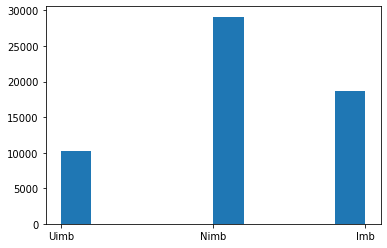

front    29069
rear     28963
Name: FrontRear, dtype: int64


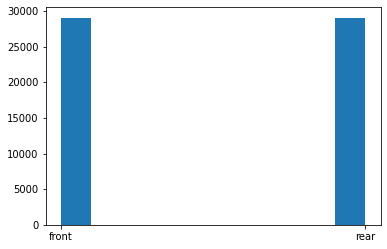

1    29040
2    28992
Name: channel, dtype: int64


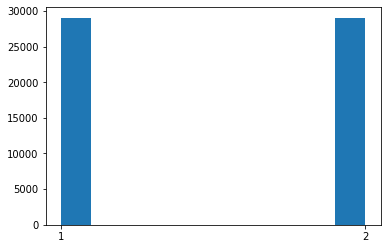

30     17169
50     14178
70      9181
90      9083
110     8421
Name: speedClass, dtype: int64


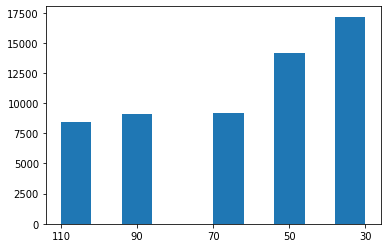

<0.049 - 0.049      25378
-0.4905-(-0.049)    22228
>0.049              10426
Name: accelX2, dtype: int64


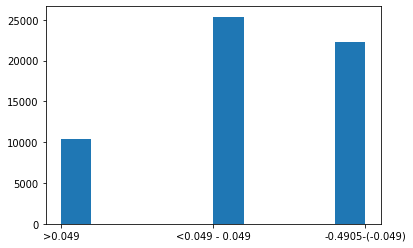

-0.049 - 0.147     21154
>0.147             18532
<=-0.147           11320
-0.147 - -0.049     7026
Name: accelY2, dtype: int64


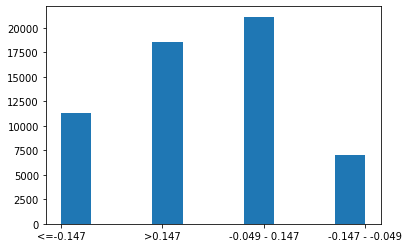

0-1.616         22990
7.05 - 11.55    15533
1.616 - 7.05    11036
>11.55           8473
Name: ambiantTemperature2, dtype: int64


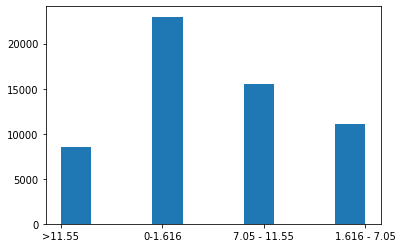

In [ ]:
for i in range(0, df.shape[1]):
    plt.hist(df[:][df.columns[i]])
    print(df[:][df.columns[i]].value_counts())
    plt.show()